# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-215-MI1,103.529881,0.004302,1285.234079,0.003763,710.323239,1285.234129,1475.218998,0.757028,3.202012,...,1.048701,0.023191,0.002132,1.023810,1.052525,0.028333,0.000875,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-215-FI2,104.088974,0.013631,1283.957446,0.011910,158.609502,1283.957446,470.955051,1.110699,2.092695,...,1.057692,0.178131,0.014005,1.101075,1.165329,0.165181,0.004902,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-215-FI6,103.889673,0.012972,1284.412416,0.011746,174.444727,1284.412416,505.346620,1.090688,2.244677,...,1.138387,0.237714,0.012505,1.034325,1.054726,0.050191,0.003783,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-216-MI1-12mw_CRR_DiadFit,103.349959,0.005332,1285.690250,0.004748,960.232163,1285.690300,1669.912267,0.637077,6.233261,...,1.034286,0.146615,0.001327,1.006431,1.023148,0.006787,0.000604,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-216-MI1,103.365025,0.010832,1285.658720,0.009743,206.580897,1285.658720,345.483289,0.625755,2.558434,...,1.041502,0.102583,0.006058,1.044025,1.075515,0.048310,0.003032,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4-start-r1.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 116/116 [00:01<00:00, 88.72it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start-r1.txt,"August 20, 2024\n",August,20.0,6.003,45.0,5.0,50.0,"['0h', '3m', '47s']",11:44:28 AM\n,42268.0,1324.964
1,FG04-A1-4-start-r2.txt,"August 20, 2024\n",August,20.0,6.011,45.0,5.0,50.0,"['0h', '3m', '46s']",11:48:36 AM\n,42516.0,1324.964
2,FG04-A1-4-start-r3.txt,"August 20, 2024\n",August,20.0,6.023,45.0,5.0,50.0,"['0h', '3m', '46s']",11:52:26 AM\n,42746.0,1324.964
3,187-1-214-MI1-15mw.txt,"August 20, 2024\n",August,20.0,15.028,60.0,4.0,50.0,"['0h', '4m', '1s']",12:35:36 PM\n,45336.0,1324.964
4,187-1-214-MI1-12mw.txt,"August 20, 2024\n",August,20.0,12.060,60.0,4.0,50.0,"['0h', '4m', '1s']",12:40:37 PM\n,45637.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start-r1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start-r1', 'FG04-A1-4-start-r2', 'FG04-A1-4-start-r3',
       '187-1-214-MI1-15mw', '187-1-214-MI1-12mw', '187-1-214-MI1-6mw',
       '187-1-215-MI1', '187-1-215-FI1', '187-1-215-FI2', '187-1-215-FI3',
       '187-1-215-FI4', '187-1-215-FI5', '187-1-215-FI6',
       '187-1-216-MI1-12mw', '187-1-216-MI3-12mw', '187-1-216-FI1',
       '187-1-216-MI3', '187-1-216-FI2', '187-1-216-FI3', '187-1-216-FI4',
       '187-1-216-MI1', '187-1-216-FI5', '187-1-216-FI6', '187-1-216-FI7',
       '186-9-202-FIC', '186-9-202-FIB', '186-9-202-FIA', '186-9-204-FIB',
       '186-9-208-FIA', 'FG04-A1-4-end-r4', 'FG04-A1-4-end-r5',
       'FG04-A1-4-end-r6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-215-MI1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-215-MI1', '187-1-215-FI2', '187-1-215-FI6',
       '187-1-216-MI1-12mw', '187-1-216-MI1', '187-1-216-FI5',
       '186-9-202-FIC', '186-9-202-FIB', '186-9-202-FIA', '186-9-208-FIA',
       '187-1-214-MI1-15mw', '187-1-214-MI1-12mw', '187-1-214-MI1-6mw',
       '187-1-215-FI1', '187-1-215-FI3', '187-1-215-FI4', '187-1-215-FI5',
       '187-1-216-MI3-12mw', '187-1-216-FI1', '187-1-216-MI3',
       '187-1-216-FI2', '187-1-216-FI3', '187-1-216-FI4', '187-1-216-FI6',
       '187-1-216-FI7', '186-9-204-FIB', 'FG04-A1-4-start-r1',
       'FG04-A1-4-start-r2', 'FG04-A1-4-start-r3', 'FG04-A1-4-end-r4',
       'FG04-A1-4-end-r5', 'FG04-A1-4-end-r6'], dtype='<U18')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-215-MI1,103.529881,0.004302,1285.234079,0.003763,710.323239,1285.234129,1475.218998,0.757028,3.202012,...,August,20.0,6.003,60.0,4.0,50.0,"['0h', '4m', '2s']",12:57:10 PM\n,46630.0,1324.964
1,187-1-215-FI2,104.088974,0.013631,1283.957446,0.011910,158.609502,1283.957446,470.955051,1.110699,2.092695,...,August,20.0,6.002,45.0,5.0,50.0,"['0h', '3m', '46s']",1:16:23 PM\n,47783.0,1324.964
2,187-1-215-FI6,103.889673,0.012972,1284.412416,0.011746,174.444727,1284.412416,505.346620,1.090688,2.244677,...,August,20.0,5.999,45.0,5.0,50.0,"['0h', '3m', '46s']",1:35:57 PM\n,48957.0,1324.964
3,187-1-216-MI1-12mw,103.349959,0.005332,1285.690250,0.004748,960.232163,1285.690300,1669.912267,0.637077,6.233261,...,August,20.0,11.951,60.0,4.0,50.0,"['0h', '4m', '2s']",2:06:35 PM\n,50795.0,1324.964
4,187-1-216-MI1,103.365025,0.010832,1285.658720,0.009743,206.580897,1285.658720,345.483289,0.625755,2.558434,...,August,20.0,6.005,60.0,4.0,100.0,"['0h', '4m', '1s']",3:03:36 PM\n,54216.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.562525059366665e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-1-215-MI1,0.229810,0.002971,0.001803,0.002361,103.315745,0.004361,0.000763,0.004302,6.003,...,NaN,NaN,NaN,NaN,NaN,NaN,46630.0,0.997932,0.997924,0.997939
1,187-1-215-FI2,0.471520,0.006661,0.006232,0.002352,103.873222,0.013625,0.000765,0.013631,6.002,...,NaN,NaN,NaN,NaN,NaN,NaN,47783.0,0.997927,0.997920,0.997935
2,187-1-215-FI6,0.382195,0.006160,0.005695,0.002348,103.673860,0.012967,0.000762,0.012972,5.999,...,NaN,NaN,NaN,NaN,NaN,NaN,48957.0,0.997923,0.997915,0.997930
3,187-1-216-MI1-12mw,0.152266,0.004450,0.002130,0.003907,103.134532,0.005375,0.000758,0.005332,11.951,...,NaN,NaN,NaN,NaN,NaN,NaN,50795.0,0.997916,0.997908,0.997923
4,187-1-216-MI1,0.157720,0.005818,0.004294,0.003925,103.148296,0.010836,0.000765,0.010832,6.005,...,NaN,NaN,NaN,NaN,NaN,NaN,54216.0,0.997903,0.997896,0.997911


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.562525059366665e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-1-215-MI1,0.229810,0.002971,0.001803,0.002361,103.315745,0.004361,0.000763,0.004302,6.003,...,NaN,NaN,NaN,NaN,NaN,NaN,46630.0,0.997932,0.997924,0.997939
1,187-1-215-FI2,0.471520,0.006661,0.006232,0.002352,103.873222,0.013625,0.000765,0.013631,6.002,...,NaN,NaN,NaN,NaN,NaN,NaN,47783.0,0.997927,0.997920,0.997935
2,187-1-215-FI6,0.382195,0.006160,0.005695,0.002348,103.673860,0.012967,0.000762,0.012972,5.999,...,NaN,NaN,NaN,NaN,NaN,NaN,48957.0,0.997923,0.997915,0.997930
3,187-1-216-MI1-12mw,0.152266,0.004450,0.002130,0.003907,103.134532,0.005375,0.000758,0.005332,11.951,...,NaN,NaN,NaN,NaN,NaN,NaN,50795.0,0.997916,0.997908,0.997923
4,187-1-216-MI1,0.157720,0.005818,0.004294,0.003925,103.148296,0.010836,0.000765,0.010832,6.005,...,NaN,NaN,NaN,NaN,NaN,NaN,54216.0,0.997903,0.997896,0.997911


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 20, 2024_fitted_2024-08-22.xlsx


## This helps visualize the errors on each spectra 

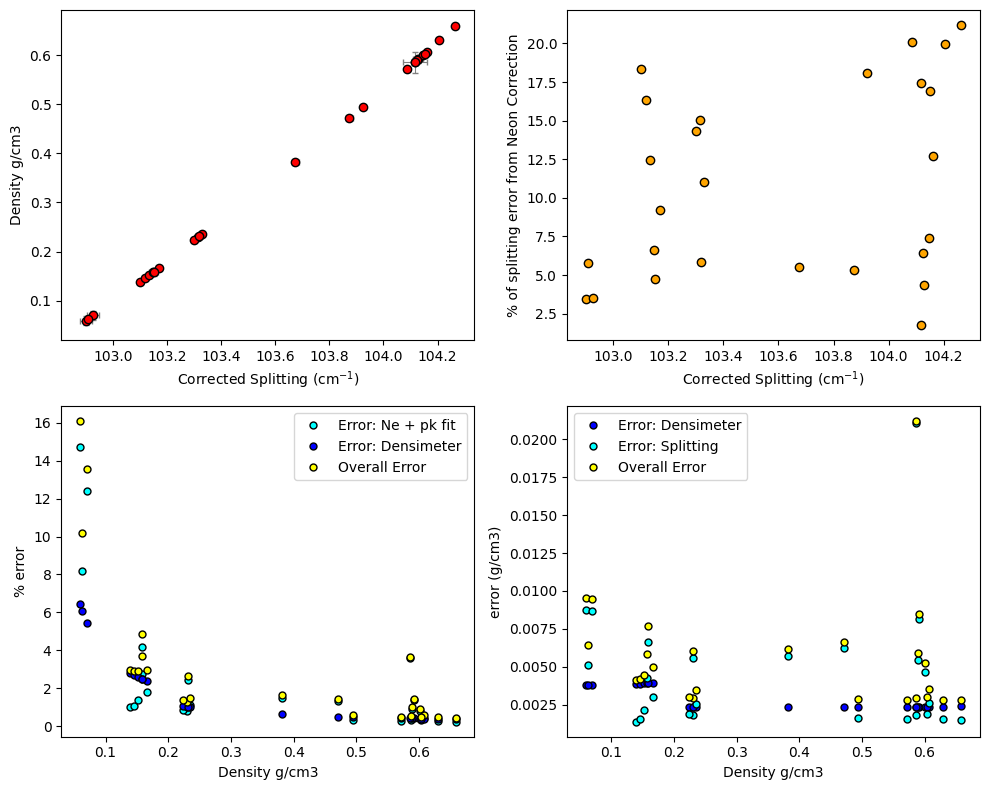

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [18]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
10,187-1-214-MI1-15mw,0.139034,0.004107,0.001379,0.003868,103.101138,0.003480,0.000765,0.003402,15.028,...,NaN,NaN,NaN,NaN,NaN,NaN,45336.0,0.997936,0.997929,0.997944
11,187-1-214-MI1-12mw,0.145527,0.004194,0.001576,0.003886,103.117525,0.003978,0.000764,0.003912,12.060,...,824.719965,66.694371,Spline,0.313191,NaN,NaN,45637.0,0.997935,0.997928,0.997943
12,187-1-214-MI1-6mw,0.166658,0.004968,0.003002,0.003958,103.170854,0.007576,0.000764,0.007553,5.998,...,551.618120,38.139167,Spline,0.430595,NaN,NaN,45931.0,0.997934,0.997927,0.997942
0,187-1-215-MI1,0.229810,0.002971,0.001803,0.002361,103.315745,0.004361,0.000763,0.004302,6.003,...,NaN,NaN,NaN,NaN,NaN,NaN,46630.0,0.997932,0.997924,0.997939
3,187-1-216-MI1-12mw,0.152266,0.004450,0.002130,0.003907,103.134532,0.005375,0.000758,0.005332,11.951,...,NaN,NaN,NaN,NaN,NaN,NaN,50795.0,0.997916,0.997908,0.997923
17,187-1-216-MI3-12mw,0.223291,0.003026,0.001892,0.002362,103.299956,0.004587,0.000760,0.004533,11.936,...,563.124818,48.769577,Spline,0.092124,NaN,NaN,51641.0,0.997912,0.997905,0.997920
19,187-1-216-MI3,0.235008,0.003482,0.002560,0.002360,103.328307,0.006182,0.000761,0.006148,6.022,...,NaN,NaN,NaN,NaN,NaN,NaN,52283.0,0.997910,0.997903,0.997917
4,187-1-216-MI1,0.157720,0.005818,0.004294,0.003925,103.148296,0.010836,0.000765,0.010832,6.005,...,NaN,NaN,NaN,NaN,NaN,NaN,54216.0,0.997903,0.997896,0.997911


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

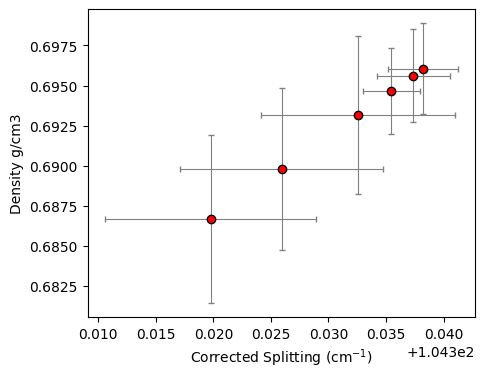

In [30]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [31]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

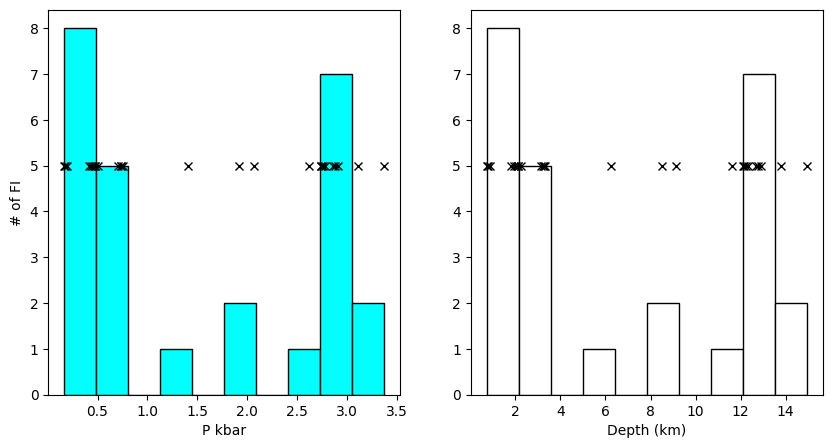

In [32]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')